0    m
1    m
2    m
3    m
4    m
5    m
6    m
7    m
8    m
9    m
10    m
11    m
12    m
13    m
14    m
15    m
16    m
17    m
18    m
19    m
20    m
21    m
22    m
23    m
24    m
25    m
26    m
27    m
28    m
29    m
30    m
31    m
32    m
33    m
34    m
35    m
36    m
37    m
38    m
39    m
40    m
41    m
42    m
43    m
44    m
45    m
46    m
47    m
48    m
49    m
50    m
51    m
52    m
53    m
54    m
55    m
56    m
57    m
58    m
59    m
60    m
61    m
62    m
63    m
64    m
65    m
66    m
67    m
68    m
69    m
70    m
71    m
72    m
73    m
74    m
75    m
76    m
77    m
78    m
79    m
80    m
81    m
82    m
83    m
84    m
85    m
86    m
87    m
88    m
89    m
90    m
91    m
92    m
93    m
94    m
95    m
96    m
97    m
98    m
99    m
100    m
101    m
102    m
103    m
104    m
105    m
106    m
107    m
108    m
109    m
110    m
111    m
112    m
113    m
114    m
115    m
116    m
117    m
118    m
119    m
120    m
121    m
122    m
123

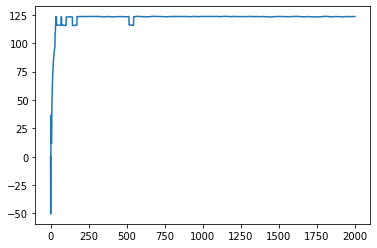

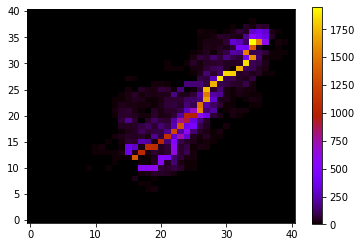

In [5]:
import numpy as np
import math 
import random
from matplotlib import cm
import matplotlib.pyplot as plt
def magnitude(X):
  suma=0.
  for j in range(len(X)):
    suma+=pow(X[j],2)
  return math.sqrt(suma)
def future_scaling(X):
  malko=min(X)
  golqmo=max(X)
  golemina=magnitude(X)
  if golqmo==malko:
    return X
  for j in range(len(X)):
    X[j]=(X[j]-malko)/(golqmo- malko)/golemina
  return X
def def_variables():
    umax_x=0.9 # Трябва да е  максималната скорост на флуида
    umax_y=0.9
    k=1.
    T_max=300 # Брой стъпки преди да терминираме ако не е намерил край
    V_ves=np.array([umax_x*k,umax_y*k]) # Скоросто на кораба спрямо скоростта на флуида
    V_mag=magnitude(V_ves)
    X_begin=np.array([35,5])
    X_fin=np.array([10,15])
    q=np.array([[[0. for i in range(8)] for j in range(41)]for k in range(41)])
    Policy=np.array([[[0.125 for i in range(8)] for j in range(41)]for k in range(41)])
    Na = 8 # Брой акции
    return T_max, V_ves, X_fin, X_begin, Na, V_mag,q,Policy
T_max, V_ves, X_fin, X_begin, Na, V_mag, q, Policy=def_variables()
def nagrada(X_tminus1,X_t,X_final=X_fin,V_mag=V_mag):
    return -0.001+((magnitude(X_final-X_tminus1)-magnitude(X_final-X_t))/V_mag)
def take_action(V_ves,speed_x,speed_y,m,n,a,V_mag=V_mag,X_fin=X_fin):
    pos_actions=np.array([[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]])
    action=np.array(pos_actions[a])
    m_t=int(float(m)+((round((float(speed_x[m][n])+float(action[0])*float(V_ves[0]))))))

    n_t=int(float(n)+((round((float(speed_y[m][n])+float(action[1])*float(V_ves[1]))))))
    
    X_tminus1, X_t = np.array([m,n]), np.array([m_t,n_t])

    #checks if we are at the final state or near it if we are terminates and gives big reward
    rewardat=0.
    if (X_fin[0]==m_t and X_fin[1]==n_t) or(X_fin[0]==m_t and X_fin[1]==n_t-1) or(X_fin[0]==m_t and X_fin[1]==n_t+1) or(X_fin[0]==m_t-1 and X_fin[1]==n_t) or(X_fin[0]==m_t+1 and X_fin[1]==n_t) or(X_fin[0]==m_t+1 and X_fin[1]==n_t+1) or(X_fin[0]==m_t+1 and X_fin[1]==n_t-1) or(X_fin[0]==m_t-1 and X_fin[1]==n_t-1) or (X_fin[0]==m_t-1 and X_fin[1]==n_t+1) :
        Terminal=True
        rewardat=100.
    #checks if we are the boundry terminates the episode because we are lost gives big punishment 
    elif m_t>40 or m_t<0 or n_t>40 or n_t<0:
        Terminal=True
        m_t, n_t=m, n
        rewardat=-100.
    #else gives me the reward and does not terminate
    else:
        Terminal=False
        rewardat=float(nagrada(X_tminus1,X_t))
    return m_t,n_t,Terminal,rewardat
def initialise_X_st(X_begin):
    X_st=np.array(X_begin[0],X_begin[1])+np.array([int(np.random.choice([-1,0,1])),int(np.random.choice([-1,0,1]))])
     # initialise a starting postion in a grid 
    return X_st
def choose_action_probability(Policy,X_current):
       a=random.choices(np.array([0,1,2,3,4,5,6,7]), Policy[X_current[0]][X_current[1]], k=1)
       return int(a[0])
def Update_q(q,a,rewarda,X_current,X_future,gamma=0.99,alpha_t=0.01):
    maxim=float(np.amax(q[X_future[0]][X_future[1]]))
    q[int(X_current[0])][int(X_current[1])][a]+=alpha_t*(rewarda+gamma*maxim-q[int(X_current[0])][int(X_current[1])][a])
    return q
def Update_policy(Policy,a,rewarda,X_current,X_future,sum=0.,ka=0.01):
    maxim=float(np.amax(q[X_future[0]][X_future[1]]))
    Policy[int(X_current[0])][int(X_current[1])][a]+=ka*(rewarda+maxim)
    Policy[int(X_current[0])][int(X_current[1])]=future_scaling(Policy[int(X_current[0])][int(X_current[1])])
    return Policy
number_of_episodes=2000
cumelative_reward=[0. for h in range(number_of_episodes)]
actions_taken=[]
trajectories = np.zeros(shape=(41,41))
u = np.zeros((41, 41))
v = np.zeros((41, 41))
# Main loop
for m in range(number_of_episodes):
    Terminal=False
    X_current=initialise_X_st(X_begin)
    X_future=np.array([0,0])
    j=0
    zi=0.
    rewarda=0.
    print(m,'   m')
    while not(Terminal or j>T_max):
        a=choose_action_probability(Policy,X_current)
        X_future[0],X_future[1], Terminal, rewarda = take_action(V_ves,v,u,int(X_current[0]),int(X_current[1]),a)
        if m == number_of_episodes-1:
            actions_taken.append((X_future[0],X_future[1]))
        trajectories[int(X_current[0])][int(X_current[1])] = trajectories[int(X_current[0])][int(X_current[1])] + 2000/number_of_episodes
        q=Update_q(q,a,rewarda,X_current,X_future)
        Policy=Update_policy(Policy,a,rewarda,X_current,X_future)
        X_current=X_future.copy()
        j+=1
        zi+=rewarda
    if m == number_of_episodes-1:
        print("Number of moves i took the agent ",j)
    cumelative_reward[m]=zi
cuma=[0. for h in range(number_of_episodes)]
# Normalises the reward of the average of the previous 30 rewards
for j in range(number_of_episodes):
    if j<30:
        for k in range(j):
           cuma[j]+=cumelative_reward[k]
        cuma[j]=float(cuma[j])/float(j+1)
    else :
        for k in range(30):
            cuma[j]+=cumelative_reward[j-29+k]
        cuma[j]=float(cuma[j])/30.
print(actions_taken)
t=np.linspace(0,number_of_episodes,number_of_episodes)
plt.plot(t,cuma)
plt.show()
plt.imshow(trajectories, cmap='gnuplot',aspect=0.8,origin='lower')
plt.colorbar()
plt.show()